In [2]:
# 移动平均线(Moving Average) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("=== 移动平均线(Moving Average) 初学者教程 ===\n")

# 1. 什么是移动平均线？
print("1️⃣ 什么是移动平均线？")
print("="*50)

print("""
🔍 移动平均线的定义：
移动平均线 = 过去N天收盘价的平均值

📊 举个例子：
假设平安银行过去5天的收盘价是：
- 第1天：10.5元
- 第2天：10.8元  
- 第3天：11.2元
- 第4天：10.9元
- 第5天：11.5元

那么5日移动平均线(MA5) = (10.5+10.8+11.2+10.9+11.5) ÷ 5 = 10.98元

第6天价格变成12元时：
MA5 = (10.8+11.2+10.9+11.5+12) ÷ 5 = 11.28元

注意：窗口"移动"了，去掉了第1天的数据，加入了第6天的数据
""")

=== 移动平均线(Moving Average) 初学者教程 ===

1️⃣ 什么是移动平均线？

🔍 移动平均线的定义：
移动平均线 = 过去N天收盘价的平均值

📊 举个例子：
假设平安银行过去5天的收盘价是：
- 第1天：10.5元
- 第2天：10.8元  
- 第3天：11.2元
- 第4天：10.9元
- 第5天：11.5元

那么5日移动平均线(MA5) = (10.5+10.8+11.2+10.9+11.5) ÷ 5 = 10.98元

第6天价格变成12元时：
MA5 = (10.8+11.2+10.9+11.5+12) ÷ 5 = 11.28元

注意：窗口"移动"了，去掉了第1天的数据，加入了第6天的数据



stock price
- 第1天：10.5元
- 第2天：10.8元  
- 第3天：11.2元
- 第4天：10.9元
- 第5天：11.5元
- 6 ： 11.7


==========================
MA5 -- 五日均线值

day 5: mean(day1-day5)
day 6: mean(day2-day6)

day 200: mean(day196-day200)




In [15]:
# 2. 创建示例数据
print("\n2️⃣ 创建示例数据")
print("="*50)

# 模拟股票价格数据
dates = pd.date_range('2023-01-01', periods=30, freq='D')
np.random.seed(42)  # 固定随机种子，确保结果可重现

# 生成模拟价格数据（有趋势的随机数据）
base_price = 10
trend = np.linspace(0, 2, 30)  # 上升趋势
noise = np.random.normal(0, 0.3, 30)  # 随机波动
prices = base_price + trend + noise

# 创建DataFrame
stock_data = pd.DataFrame({
    '日期': dates,
    '收盘价': prices
})
stock_data.set_index('日期', inplace=True)

print("模拟股票数据（前10天）：")
print(stock_data.head(10).round(2))


2️⃣ 创建示例数据
模拟股票数据（前10天）：
              收盘价
日期               
2023-01-01  10.15
2023-01-02  10.03
2023-01-03  10.33
2023-01-04  10.66
2023-01-05  10.21
2023-01-06  10.27
2023-01-07  10.89
2023-01-08  10.71
2023-01-09  10.41
2023-01-10  10.78


In [17]:
# 3. 计算移动平均线
print("\n3️⃣ 计算移动平均线")
print("="*50)

# 计算不同周期的移动平均线
stock_data['MA5'] = stock_data['收盘价'].rolling(window=5).mean()
stock_data['MA10'] = stock_data['收盘价'].rolling(window=10).mean()
stock_data['MA20'] = stock_data['收盘价'].rolling(window=20).mean()

print("包含移动平均线的数据（前15天）：")
print(stock_data.head(15).round(2))


3️⃣ 计算移动平均线
包含移动平均线的数据（前15天）：
              收盘价    MA5   MA10  MA20
日期                                   
2023-01-01  10.15    NaN    NaN   NaN
2023-01-02  10.03    NaN    NaN   NaN
2023-01-03  10.33    NaN    NaN   NaN
2023-01-04  10.66    NaN    NaN   NaN
2023-01-05  10.21  10.28    NaN   NaN
2023-01-06  10.27  10.30    NaN   NaN
2023-01-07  10.89  10.47    NaN   NaN
2023-01-08  10.71  10.55    NaN   NaN
2023-01-09  10.41  10.50    NaN   NaN
2023-01-10  10.78  10.61  10.44   NaN
2023-01-11  10.55  10.67  10.48   NaN
2023-01-12  10.62  10.62  10.54   NaN
2023-01-13  10.90  10.65  10.60   NaN
2023-01-14  10.32  10.64  10.57   NaN
2023-01-15  10.45  10.57  10.59   NaN


In [5]:
# 4. 解释不同周期的移动平均线
print("\n4️⃣ 不同周期移动平均线的特点")
print("="*50)

print("""
📈 移动平均线的特点：

🔴 MA5 (5日移动平均线)：
   - 反应最灵敏，跟随价格变化快
   - 适合短期交易
   - 容易产生假信号

🟠 MA10 (10日移动平均线)：
   - 中等灵敏度
   - 平衡短期和长期趋势
   - 常用作短期支撑阻力

🔵 MA20 (20日移动平均线)：
   - 平滑效果好，显示中期趋势
   - 常用作中期支撑阻力
   - 适合趋势跟踪

🟣 MA60 (60日移动平均线)：
   - 最平滑，显示长期趋势
   - 适合判断大趋势方向
   - 滞后性最强
""")


4️⃣ 不同周期移动平均线的特点

📈 移动平均线的特点：

🔴 MA5 (5日移动平均线)：
   - 反应最灵敏，跟随价格变化快
   - 适合短期交易
   - 容易产生假信号

🟠 MA10 (10日移动平均线)：
   - 中等灵敏度
   - 平衡短期和长期趋势
   - 常用作短期支撑阻力

🔵 MA20 (20日移动平均线)：
   - 平滑效果好，显示中期趋势
   - 常用作中期支撑阻力
   - 适合趋势跟踪

🟣 MA60 (60日移动平均线)：
   - 最平滑，显示长期趋势
   - 适合判断大趋势方向
   - 滞后性最强




5️⃣ 移动平均线可视化


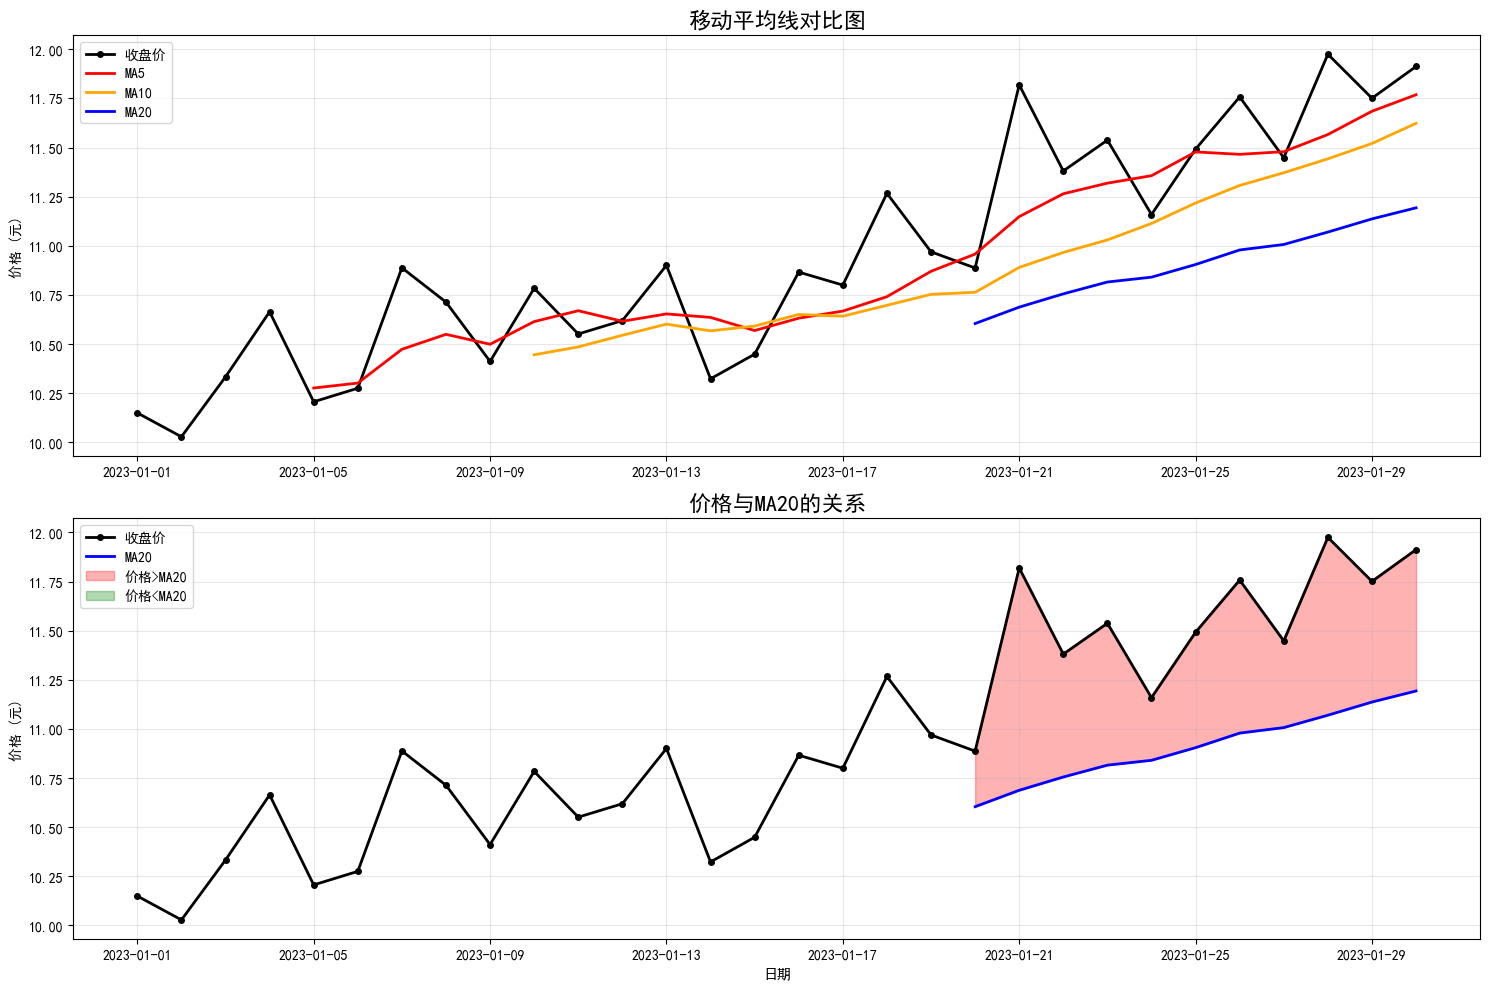

In [18]:
# 5. 可视化展示
print("\n5️⃣ 移动平均线可视化")
print("="*50)

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 上图：价格和所有移动平均线
ax1.plot(stock_data.index, stock_data['收盘价'], label='收盘价', linewidth=2, color='black', marker='o', markersize=4)
ax1.plot(stock_data.index, stock_data['MA5'], label='MA5', linewidth=2, color='red')
ax1.plot(stock_data.index, stock_data['MA10'], label='MA10', linewidth=2, color='orange')
ax1.plot(stock_data.index, stock_data['MA20'], label='MA20', linewidth=2, color='blue')

ax1.set_title('移动平均线对比图', fontsize=16, fontweight='bold')
ax1.set_ylabel('价格 (元)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 下图：价格与MA20的对比
ax2.plot(stock_data.index, stock_data['收盘价'], label='收盘价', linewidth=2, color='black', marker='o', markersize=4)
ax2.plot(stock_data.index, stock_data['MA20'], label='MA20', linewidth=2, color='blue')

# 填充价格与MA20之间的区域
ax2.fill_between(stock_data.index, stock_data['收盘价'], stock_data['MA20'], 
                 where=(stock_data['收盘价'] >= stock_data['MA20']), 
                 color='red', alpha=0.3, label='价格>MA20')
ax2.fill_between(stock_data.index, stock_data['收盘价'], stock_data['MA20'], 
                 where=(stock_data['收盘价'] < stock_data['MA20']), 
                 color='green', alpha=0.3, label='价格<MA20')

ax2.set_title('价格与MA20的关系', fontsize=16, fontweight='bold')
ax2.set_ylabel('价格 (元)')
ax2.set_xlabel('日期')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# 6. 金叉死叉概念
print("\n6️⃣ 金叉死叉概念")
print("="*50)

# 计算金叉死叉信号
stock_data['MA5_MA20_Signal'] = 0
stock_data.loc[stock_data['MA5'] > stock_data['MA20'], 'MA5_MA20_Signal'] = 1
stock_data.loc[stock_data['MA5'] < stock_data['MA20'], 'MA5_MA20_Signal'] = -1

# 找到金叉死叉点
golden_cross = (stock_data['MA5_MA20_Signal'] == 1) & (stock_data['MA5_MA20_Signal'].shift(1) == -1)
death_cross = (stock_data['MA5_MA20_Signal'] == -1) & (stock_data['MA5_MA20_Signal'].shift(1) == 1)

print("""
🎯 金叉死叉概念：

🟢 金叉 (Golden Cross)：
   - 短期均线上穿长期均线
   - 例如：MA5上穿MA20
   - 通常认为是买入信号
   - 表示短期趋势转强

🔴 死叉 (Death Cross)：
   - 短期均线下穿长期均线
   - 例如：MA5下穿MA20
   - 通常认为是卖出信号
   - 表示短期趋势转弱
""")

# 显示信号统计
golden_cross_dates = stock_data[golden_cross].index
death_cross_dates = stock_data[death_cross].index

print(f"\n📊 信号统计：")
print(f"金叉次数：{len(golden_cross_dates)}")
print(f"死叉次数：{len(death_cross_dates)}")

if len(golden_cross_dates) > 0:
    print(f"金叉日期：{[d.strftime('%m-%d') for d in golden_cross_dates]}")
if len(death_cross_dates) > 0:
    print(f"死叉日期：{[d.strftime('%m-%d') for d in death_cross_dates]}")


6️⃣ 金叉死叉概念

🎯 金叉死叉概念：

🟢 金叉 (Golden Cross)：
   - 短期均线上穿长期均线
   - 例如：MA5上穿MA20
   - 通常认为是买入信号
   - 表示短期趋势转强

🔴 死叉 (Death Cross)：
   - 短期均线下穿长期均线
   - 例如：MA5下穿MA20
   - 通常认为是卖出信号
   - 表示短期趋势转弱


📊 信号统计：
金叉次数：0
死叉次数：0


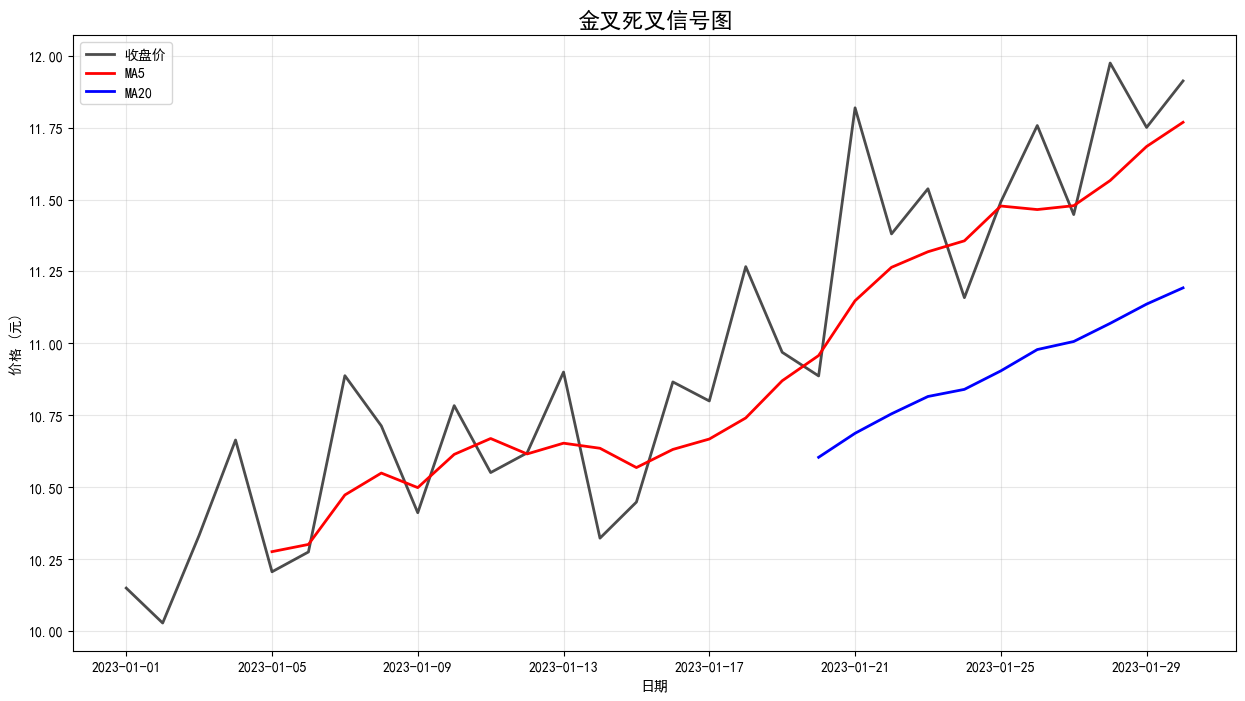

In [22]:
# 7. 金叉死叉可视化
fig, ax = plt.subplots(figsize=(15, 8))

# 绘制价格和均线
ax.plot(stock_data.index, stock_data['收盘价'], label='收盘价', linewidth=2, color='black', alpha=0.7)
ax.plot(stock_data.index, stock_data['MA5'], label='MA5', linewidth=2, color='red')
ax.plot(stock_data.index, stock_data['MA20'], label='MA20', linewidth=2, color='blue')

# 标记金叉死叉
if len(golden_cross_dates) > 0:
    ax.scatter(golden_cross_dates, stock_data.loc[golden_cross_dates, '收盘价'], 
               color='green', s=150, marker='^', label='金叉', zorder=5)
if len(death_cross_dates) > 0:
    ax.scatter(death_cross_dates, stock_data.loc[death_cross_dates, '收盘价'], 
               color='red', s=150, marker='v', label='死叉', zorder=5)

ax.set_title('金叉死叉信号图', fontsize=16, fontweight='bold')
ax.set_ylabel('价格 (元)')
ax.set_xlabel('日期')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

📈 正在获取 600519 的股票数据...
✅ 成功获取 98 条数据
📅 数据时间范围：2024-01-02 至 2024-05-31

📊 基本统计信息：
最新收盘价：1566.09 元
最高价：1695.44 元
最低价：1473.19 元
平均成交量：28590 手

📈 移动平均线（最新）：
MA5: 1578.88
MA10: 1596.34
MA20: 1622.82
MA60: 1613.66

🎯 信号统计：
金叉次数：4
死叉次数：4
最近金叉：2024-04-25
最近死叉：2024-05-17


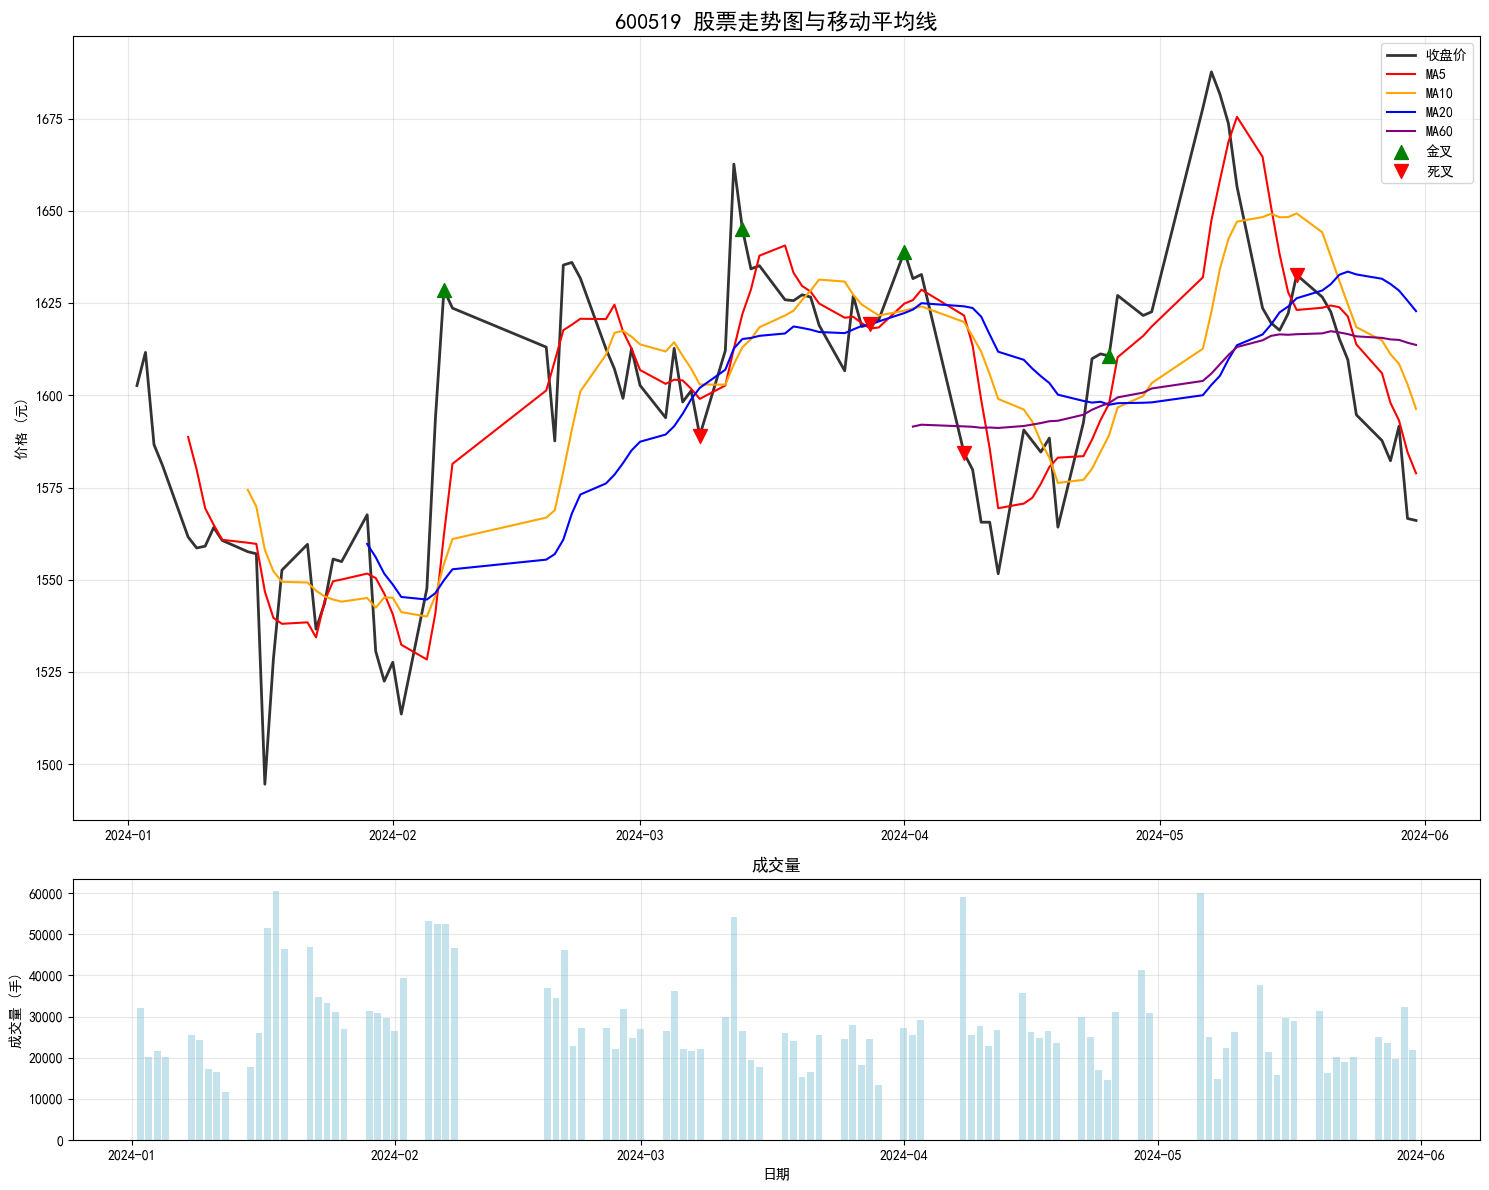

In [23]:
# 现在使用akshare获取真实的股票数据，并计算移动平均线
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取股票数据（以贵州茅台为例）
stock_code = "600519"  # 贵州茅台
start_date = "20240101"
end_date = "20240601"

print(f"📈 正在获取 {stock_code} 的股票数据...")

try:
    # 获取股票历史数据
    stock_data = ak.stock_zh_a_hist(symbol=stock_code, 
                                   start_date=start_date, 
                                   end_date=end_date, 
                                   adjust="qfq")
    
    # 重命名列
    stock_data.columns = ['日期','股票代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
    
    # 设置日期为索引
    stock_data.set_index('日期', inplace=True)
    
    print(f"✅ 成功获取 {len(stock_data)} 条数据")
    print(f"📅 数据时间范围：{stock_data.index[0].strftime('%Y-%m-%d')} 至 {stock_data.index[-1].strftime('%Y-%m-%d')}")
    
    # 计算移动平均线
    stock_data['MA5'] = stock_data['收盘价'].rolling(window=5).mean()
    stock_data['MA10'] = stock_data['收盘价'].rolling(window=10).mean()
    stock_data['MA20'] = stock_data['收盘价'].rolling(window=20).mean()
    stock_data['MA60'] = stock_data['收盘价'].rolling(window=60).mean()
    
    # 计算金叉死叉信号
    golden_cross = (stock_data['MA5'] > stock_data['MA20']) & (stock_data['MA5'].shift(1) <= stock_data['MA20'].shift(1))
    death_cross = (stock_data['MA5'] < stock_data['MA20']) & (stock_data['MA5'].shift(1) >= stock_data['MA20'].shift(1))
    
    # 显示基本统计信息
    print(f"\n📊 基本统计信息：")
    print(f"最新收盘价：{stock_data['收盘价'].iloc[-1]:.2f} 元")
    print(f"最高价：{stock_data['最高价'].max():.2f} 元")
    print(f"最低价：{stock_data['最低价'].min():.2f} 元")
    print(f"平均成交量：{stock_data['成交量'].mean():.0f} 手")
    
    # 显示移动平均线信息
    print(f"\n📈 移动平均线（最新）：")
    print(f"MA5: {stock_data['MA5'].iloc[-1]:.2f}")
    print(f"MA10: {stock_data['MA10'].iloc[-1]:.2f}")
    print(f"MA20: {stock_data['MA20'].iloc[-1]:.2f}")
    print(f"MA60: {stock_data['MA60'].iloc[-1]:.2f}")
    
    # 显示信号统计
    golden_cross_dates = stock_data[golden_cross].index
    death_cross_dates = stock_data[death_cross].index
    
    print(f"\n🎯 信号统计：")
    print(f"金叉次数：{len(golden_cross_dates)}")
    print(f"死叉次数：{len(death_cross_dates)}")
    
    if len(golden_cross_dates) > 0:
        print(f"最近金叉：{golden_cross_dates[-1].strftime('%Y-%m-%d')}")
    if len(death_cross_dates) > 0:
        print(f"最近死叉：{death_cross_dates[-1].strftime('%Y-%m-%d')}")
    
    # 绘制完整的股票图表
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[3, 1])
    
    # 上图：价格和均线
    ax1.plot(stock_data.index, stock_data['收盘价'], label='收盘价', linewidth=2, color='black', alpha=0.8)
    ax1.plot(stock_data.index, stock_data['MA5'], label='MA5', linewidth=1.5, color='red')
    ax1.plot(stock_data.index, stock_data['MA10'], label='MA10', linewidth=1.5, color='orange')
    ax1.plot(stock_data.index, stock_data['MA20'], label='MA20', linewidth=1.5, color='blue')
    ax1.plot(stock_data.index, stock_data['MA60'], label='MA60', linewidth=1.5, color='purple')
    
    # 标记金叉死叉
    if len(golden_cross_dates) > 0:
        ax1.scatter(golden_cross_dates, stock_data.loc[golden_cross_dates, '收盘价'], 
                   color='green', s=100, marker='^', label='金叉', zorder=5)
    if len(death_cross_dates) > 0:
        ax1.scatter(death_cross_dates, stock_data.loc[death_cross_dates, '收盘价'], 
                   color='red', s=100, marker='v', label='死叉', zorder=5)
    
    ax1.set_title(f'{stock_code} 股票走势图与移动平均线', fontsize=16, fontweight='bold')
    ax1.set_ylabel('价格 (元)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 下图：成交量
    ax2.bar(stock_data.index, stock_data['成交量'], color='lightblue', alpha=0.7)
    ax2.set_title('成交量', fontsize=12)
    ax2.set_ylabel('成交量 (手)')
    ax2.set_xlabel('日期')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"❌ 获取数据失败：{e}")
    print("请检查网络连接或股票代码是否正确")


In [13]:
stock_data

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2024-01-02,600519,1632.64,1602.65,1635.83,1595.74,32156,5.440083e+09,2.44,-2.49,-40.99,0.26
2024-01-03,600519,1598.75,1611.64,1612.86,1593.97,20229,3.411401e+09,1.18,0.56,8.99,0.16
2024-01-04,600519,1610.64,1586.64,1610.64,1580.57,21551,3.603970e+09,1.87,-1.55,-25.00,0.17
2024-01-05,600519,1578.97,1581.00,1596.30,1569.75,20243,3.373156e+09,1.67,-0.36,-5.64,0.16
2024-01-08,600519,1578.64,1561.63,1579.64,1557.65,25586,4.211919e+09,1.39,-1.23,-19.37,0.20
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,600519,1595.64,1587.76,1605.09,1585.65,25098,4.199002e+09,1.22,-0.44,-6.96,0.20
2024-05-28,600519,1588.04,1582.28,1592.81,1580.64,23521,3.923020e+09,0.77,-0.35,-5.48,0.19
2024-05-29,600519,1583.64,1591.64,1597.64,1582.64,19651,3.289173e+09,0.95,0.59,9.36,0.16


金叉
定义： 短期均线由下向上穿越长期均线，形成的交叉点称为“金叉”。

原理：

短期趋势转强： 短期均线向上穿越长期均线，意味着最近一段时间的平均交易成本已经超过了较长时间的平均交易成本。

多头力量增强： 这表明市场上的买方力量（多头）在短期内变得比卖方力量（空头）更积极，愿意以高于长期平均成本的价格买入。

上升趋势可能开始： 这是一个潜在的趋势反转信号，可能预示着下跌趋势的结束和上升趋势的开始，或者上升趋势的加速。

买入信号： 因此，金叉通常被视为一个买入信号或看涨信号。技术分析者认为这是介入市场或加仓的潜在时机。

死叉
定义： 短期均线由上向下穿越长期均线，形成的交叉点称为“死叉”。

原理：

短期趋势转弱： 短期均线向下穿越长期均线，意味着最近一段时间的平均交易成本已经低于较长时间的平均交易成本。

空头力量增强： 这表明市场上的卖方力量（空头）在短期内变得比买方力量（多头）更积极，愿意以低于长期平均成本的价格卖出。

下跌趋势可能开始： 这是一个潜在的趋势反转信号，可能预示着上升趋势的结束和下跌趋势的开始，或者下跌趋势的加速。

卖出信号： 因此，死叉通常被视为一个卖出信号或看跌信号。技术分析者认为这是离场、减仓或考虑做空（如果允许）的潜在时机。